In [1]:
pip install xgboost


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
p2_df = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_P2.txt'
fn400_df = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_FN400.txt'
p3_df = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_P3.txt'
n2_df = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_N2.txt'

alltrials_150275_df = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS150275.txt'
alltrials_150350_df = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS150350.txt'
alltrials_250400_df = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS250400.txt'
alltrials_300500_df = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS300500.txt'
alltrials_550800_df = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS550800.txt'

In [4]:
file_list = [p2_df, fn400_df, p3_df, n2_df, alltrials_150275_df, alltrials_150350_df, alltrials_250400_df, alltrials_300500_df, alltrials_550800_df]

In [5]:
for file in file_list:
    print(file[60:-4]+'.csv')

Peaks_P2.csv
Peaks_FN400.csv
Peaks_P3.csv
Peaks_N2.csv
ALLTRIALS150275.csv
ALLTRIALS150350.csv
ALLTRIALS250400.csv
ALLTRIALS300500.csv
ALLTRIALS550800.csv


In [6]:
file = r'C:\Users\Loaner\Downloads\data for project\data for project\ALLTRIALS250400.txt'
print(file[60:-4])
df = pd.read_csv(file, delimiter=',')
cname = list(df)

ALLTRIALS250400


In [7]:
file = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_P2.txt'
df = pd.read_csv(file, delimiter=',')
indexnames = list(df['File'])
colnames = list(df)

In [8]:
file = r'C:\Users\Loaner\Downloads\data for project\data for project\Peaks_P3.txt'
df = pd.read_csv(file, delimiter=',', skiprows=1, header=None, names=colnames)
df.head()

,File,Fz-PeakDetection_Consistent-L,Fz-PeakDetection_Consistent-V,Fz-PeakDetection_Misleading-L,Fz-PeakDetection_Misleading-V,Fz-PeakDetection_Control-L,Fz-PeakDetection_Control-V,F3-PeakDetection_Consistent-L,F3-PeakDetection_Consistent-V,F3-PeakDetection_Misleading-L,...,F8-PeakDetection_Misleading-L,F8-PeakDetection_Misleading-V,F8-PeakDetection_Control-L,F8-PeakDetection_Control-V,Fp2-PeakDetection_Consistent-L,Fp2-PeakDetection_Consistent-V,Fp2-PeakDetection_Misleading-L,Fp2-PeakDetection_Misleading-V,Fp2-PeakDetection_Control-L,Fp2-PeakDetection_Control-V
0,Training_000018,398,-0.923073,312,1.237552,316,2.471181,398,6.413564,274,...,352,-10.575669,316,-11.652802,334,1.340762,350,2.524234,296,0.860421
1,Training_000019_002,356,-1.120748,342,-1.723032,356,-0.059799,354,3.891839,372,...,300,-2.086055,314,0.121062,280,6.169767,276,5.799749,250,8.706077
2,Training_000020_003,350,7.482613,342,7.099355,358,6.060843,398,9.442624,398,...,288,11.990067,348,11.378200,350,8.989120,316,0.674081,356,2.366387
3,Training_000021_004,304,8.967395,326,9.688957,304,9.598904,306,16.597273,328,...,262,-7.091208,250,-3.739562,270,17.595606,338,15.890282,292,19.353285
4,Training_000022_005,344,2.899613,306,2.816482,360,1.835616,362,7.112487,372,...,274,3.144250,254,3.924090,378,5.618747,308,7.464533,360,8.499284


In [9]:
for file in file_list:
    
    # Reading the text file into a pandas DataFrame
    if file[60:69] == 'ALLTRIALS':
        if file[69:75] == '150275':
            df = pd.read_csv(file, delim_whitespace=True, skiprows=1, names=cname) 
        else:                
            df = pd.read_csv(file, delimiter=',')
            if file[69:75] == '300500':
                df = df.iloc[:, :-1]                
        df = df.drop(columns=['Fp1_BaselineCorrectionCONSISTENT', 'Fp1_BaselineCorrectionMISLEADING', 'Fp1_BaselineCorrectionCONTROL'], axis=1)
    else: 
        df = pd.read_csv(file, delimiter=',')  
        if file[60:-4] == 'Peaks_P3':
            df = pd.read_csv(file, delimiter=',', skiprows=1, header=None, names=colnames)#giving the columns names 
            
    # Specifying the output CSV file paths
    filename = file[60:-4] + '.csv'
    csv_file = 'C:\\Users\\Loaner\\Documents\\neuro_data\\' + filename
    # Saving the DataFrame as a CSV file
    df.to_csv(csv_file, index=False)

C:\Users\Loaner\AppData\Local\Temp\ipykernel_19576\1274031303.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1, names=cname)


Define File Paths and Load Data

In [11]:

peak_files = {
    "P2": r'C:\Users\Loaner\Documents\neuro_data\Peaks_P2.csv',
    "FN400": r'C:\Users\Loaner\Documents\neuro_data\Peaks_FN400.csv',
    "N2": r'C:\Users\Loaner\Documents\neuro_data\Peaks_N2.csv',
    "P3": r'C:\Users\Loaner\Documents\neuro_data\Peaks_P3.csv',
}

alltrial_files = {
    "150-275ms": r'C:\Users\Loaner\Documents\neuro_data\ALLTRIALS150275.csv',
    "150-350ms": r'C:\Users\Loaner\Documents\neuro_data\ALLTRIALS150350.csv',
    "250-400ms": r'C:\Users\Loaner\Documents\neuro_data\ALLTRIALS250400.csv',
    "300-500ms": r'C:\Users\Loaner\Documents\neuro_data\ALLTRIALS300500.csv',
    "550-800ms": r'C:\Users\Loaner\Documents\neuro_data\ALLTRIALS550800.csv',
}


peak_data = {key: pd.read_csv(path) for key, path in peak_files.items()}
alltrial_data = {key: pd.read_csv(path) for key, path in alltrial_files.items()}


for key, df in peak_data.items():
    print(f"{key} Peak Data Shape: {df.shape}")
    print(df.head())

for key, df in alltrial_data.items():
    print(f"{key} ALLTRIALS Data Shape: {df.shape}")
    print(df.head())


P2 Peak Data Shape: (25, 181)
                  File  Fz-PeakDetection_Consistent-L  \
0      Training_000018                            204   
1  Training_000019_002                            198   
2  Training_000020_003                            152   
3  Training_000021_004                            274   
4  Training_000022_005                            154   

   Fz-PeakDetection_Consistent-V  Fz-PeakDetection_Misleading-L  \
0                       2.996225                            172   
1                       0.134846                            174   
2                       7.720881                            152   
3                       4.943797                            204   
4                       5.169791                            170   

   Fz-PeakDetection_Misleading-V  Fz-PeakDetection_Control-L  \
0                       4.589291                         198   
1                       1.781672                         216   
2                       6.986287

Data Cleaning

In [13]:

for key in peak_data:
    peak_data[key] = peak_data[key].loc[:, ~peak_data[key].columns.str.contains('Fp1')]

for key in alltrial_data:
    alltrial_data[key] = alltrial_data[key].loc[:, ~alltrial_data[key].columns.str.contains('Fp1')]


for key in peak_data:
    peak_data[key] = peak_data[key].melt(id_vars=['File'], var_name='Metric', value_name='Value')

for key in alltrial_data:
    alltrial_data[key] = alltrial_data[key].melt(id_vars=['File'], var_name='Metric', value_name='Value')


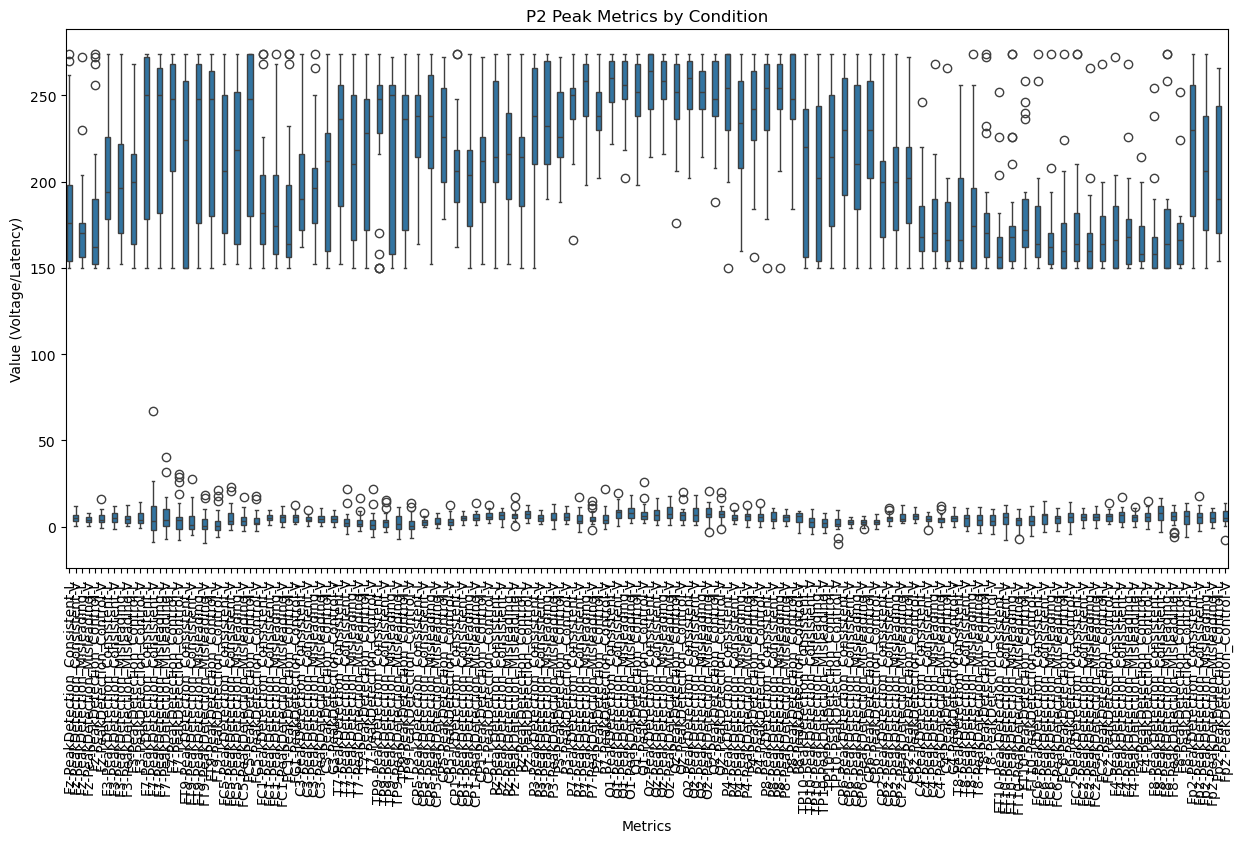

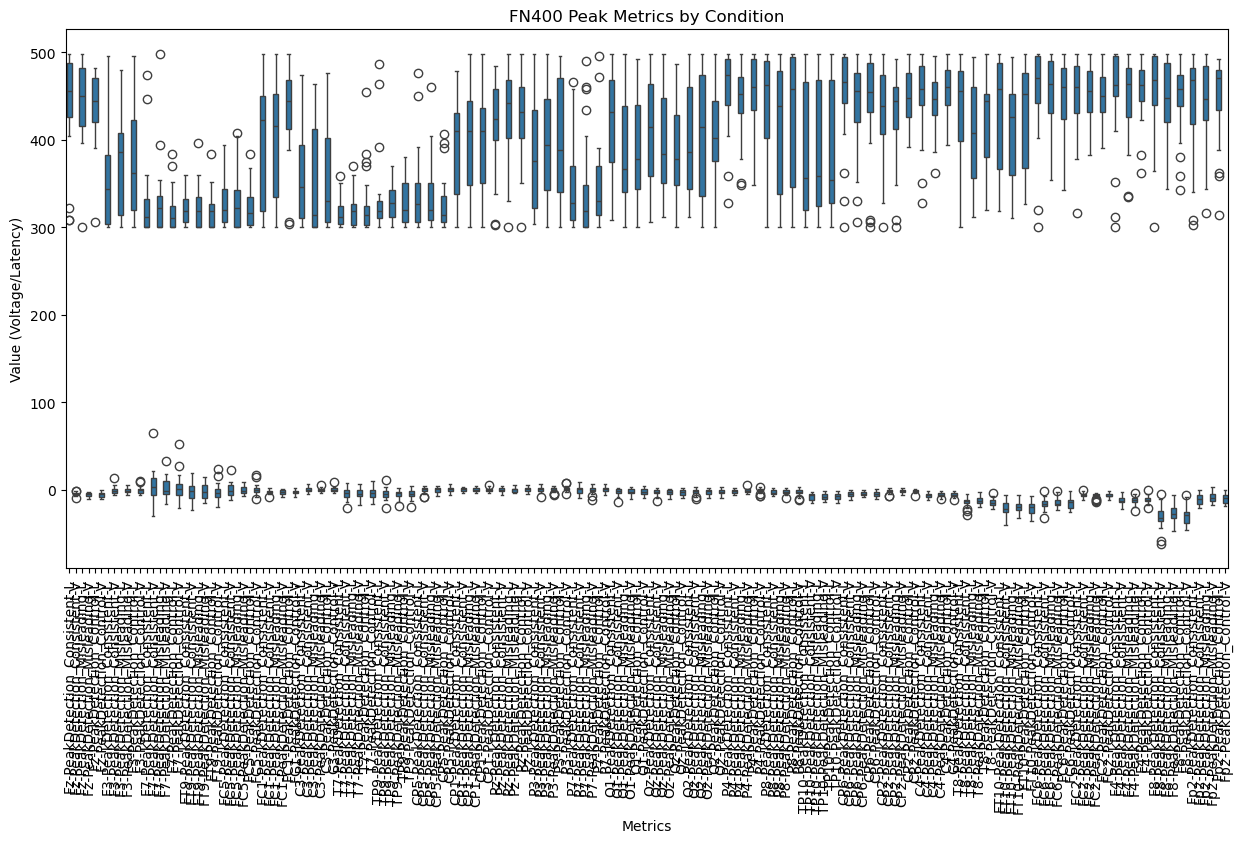

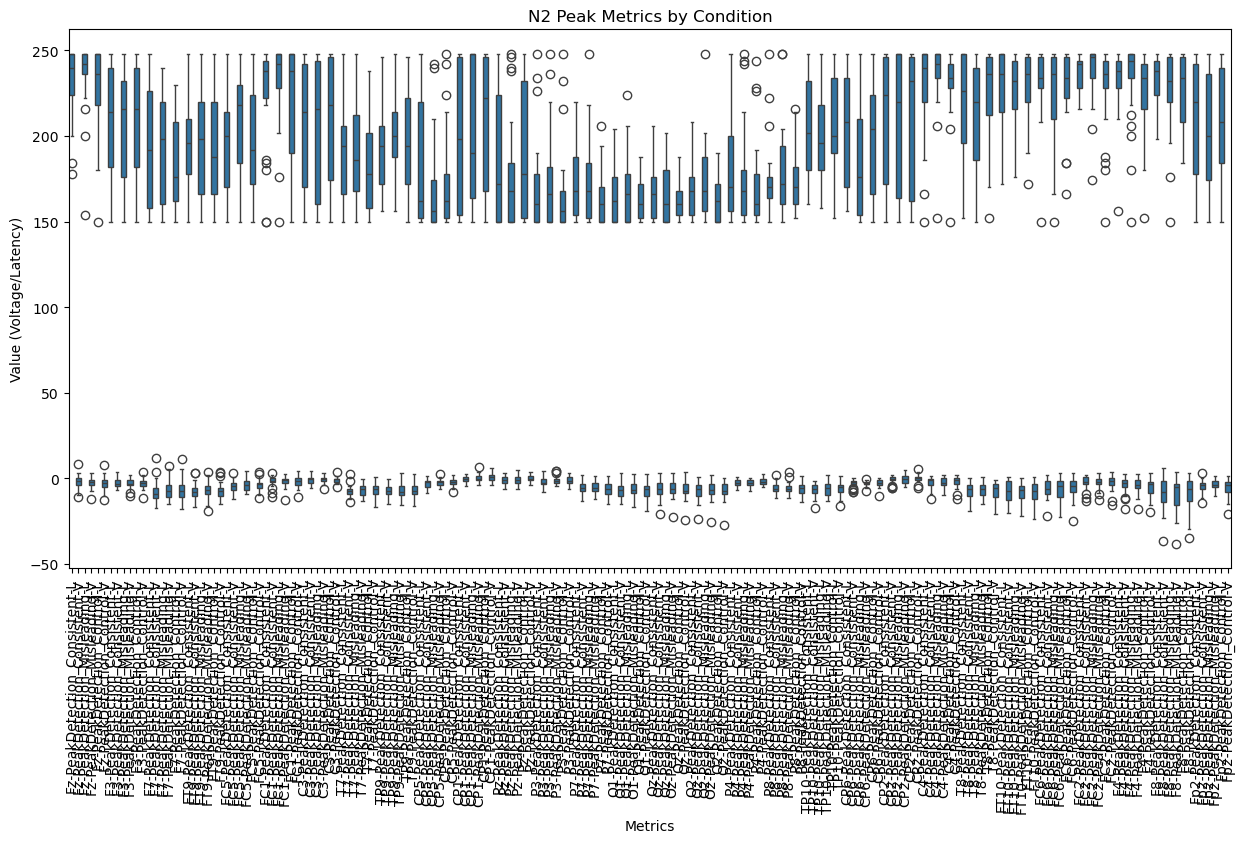

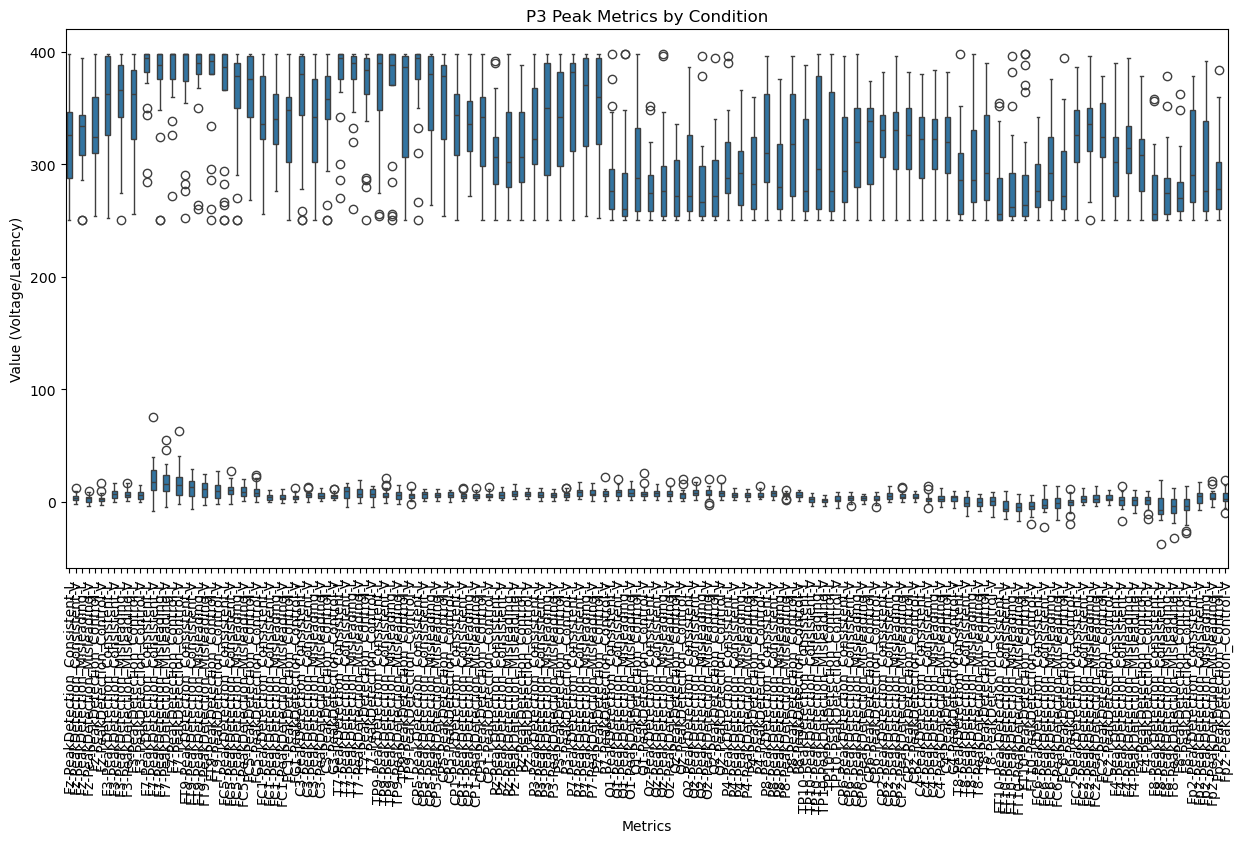

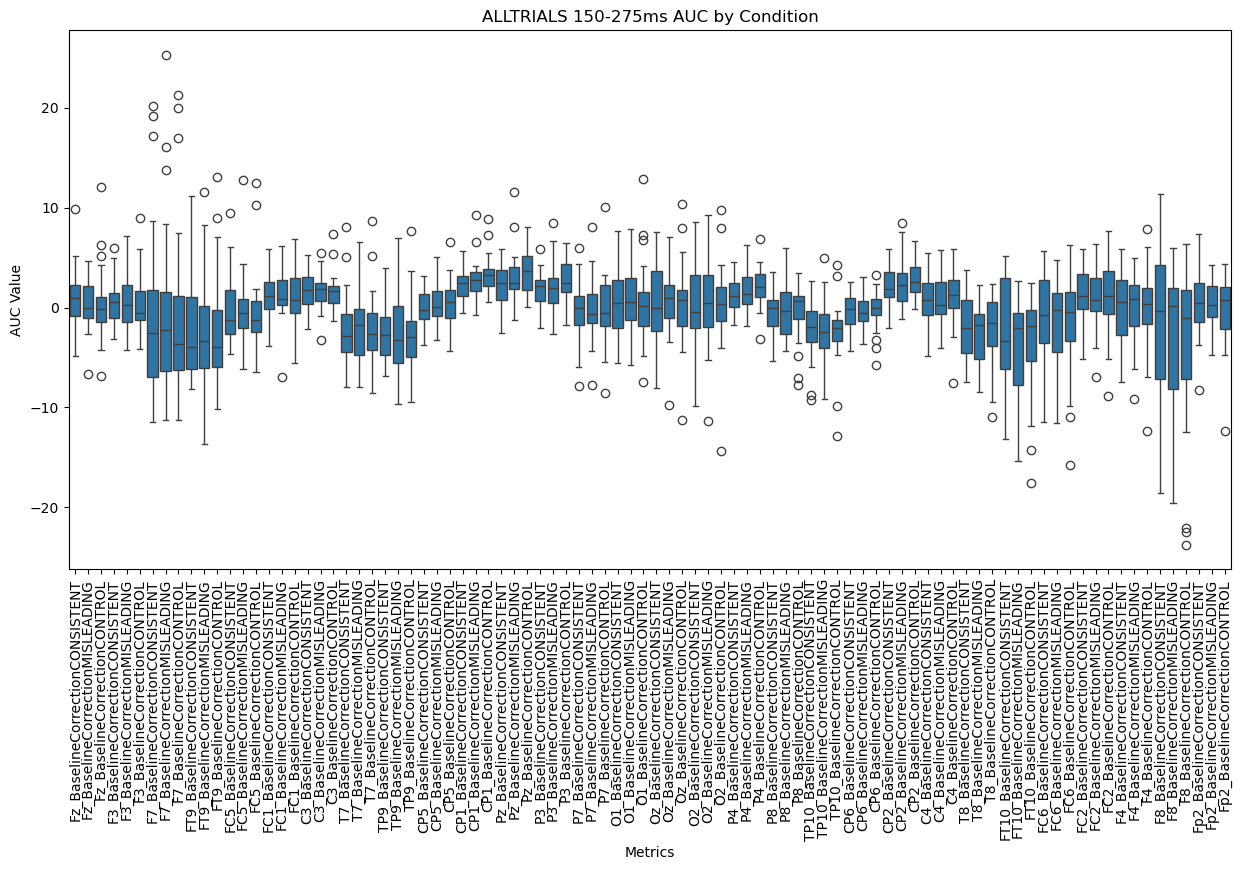

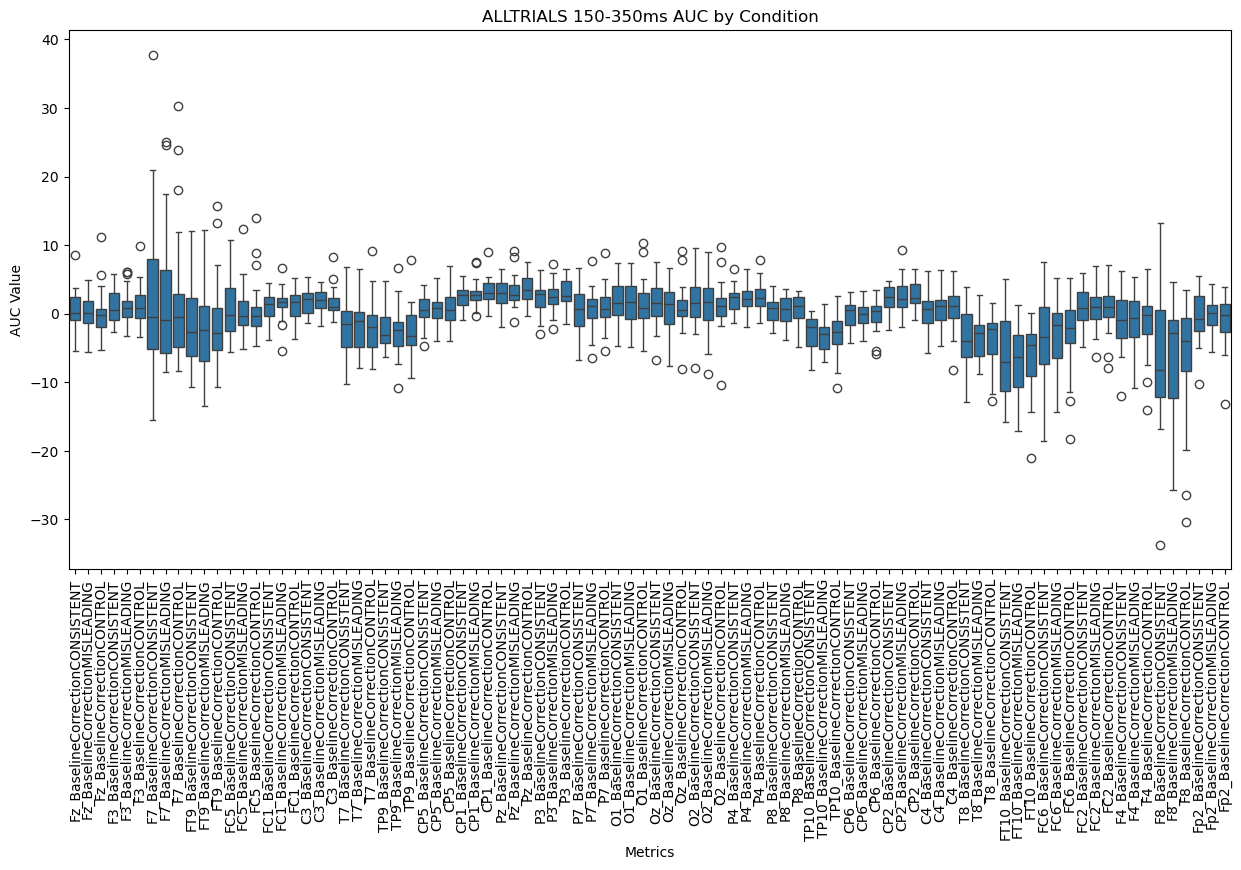

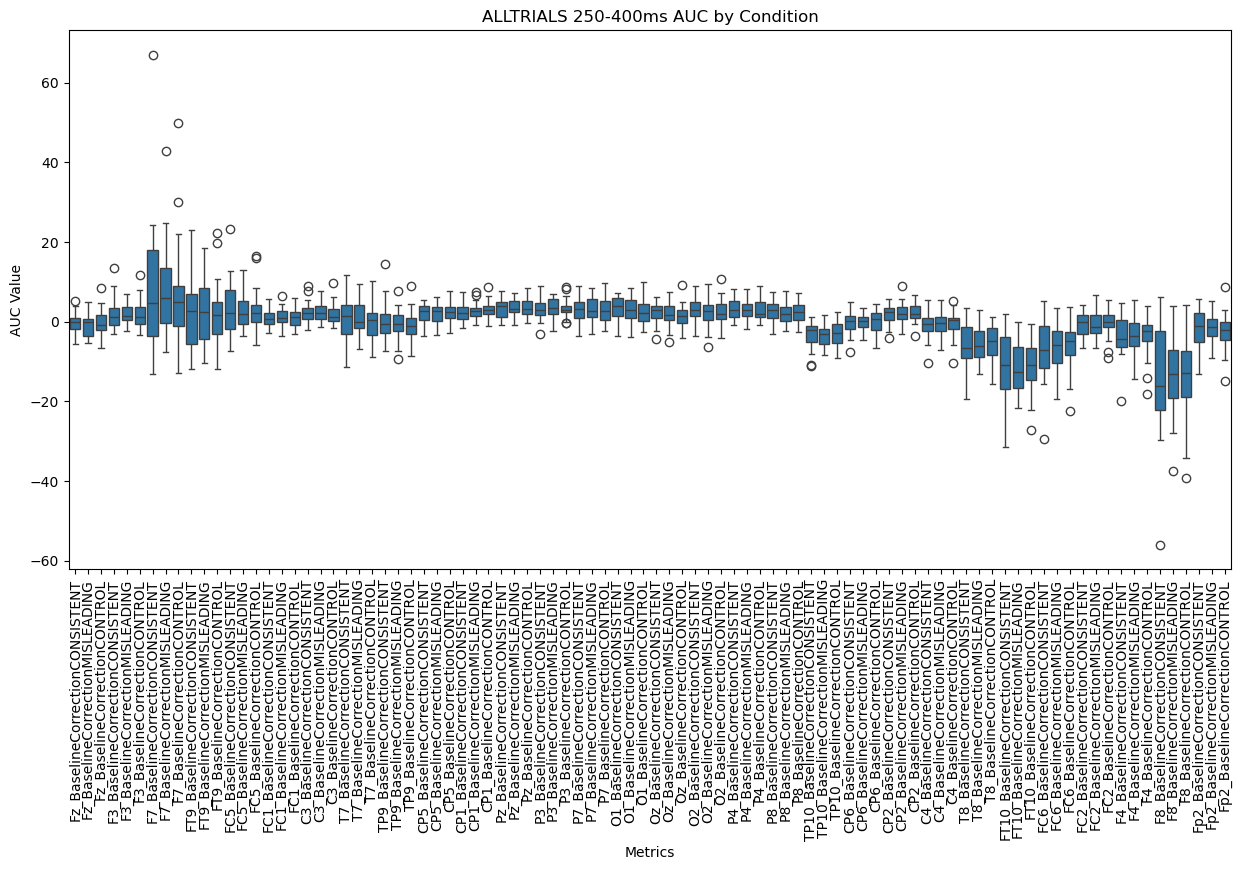

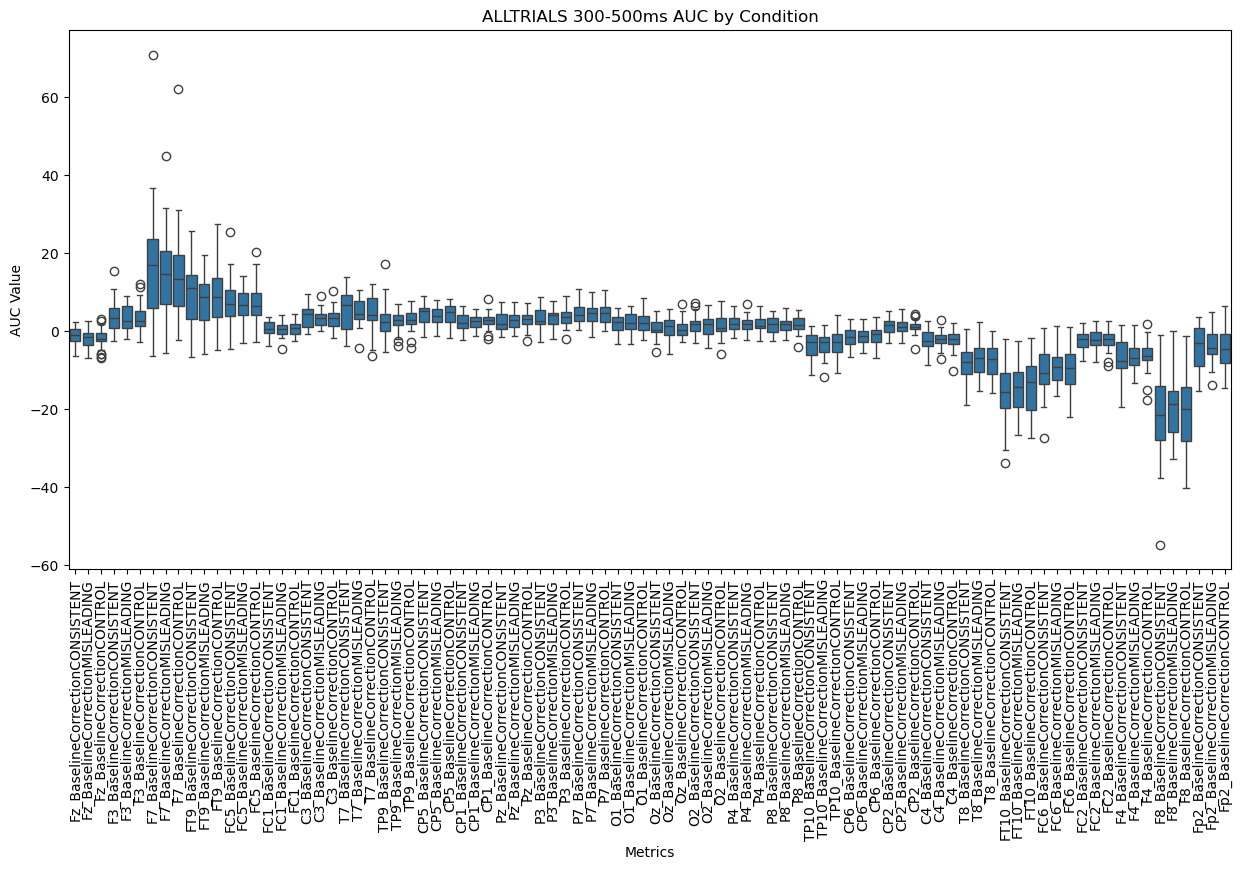

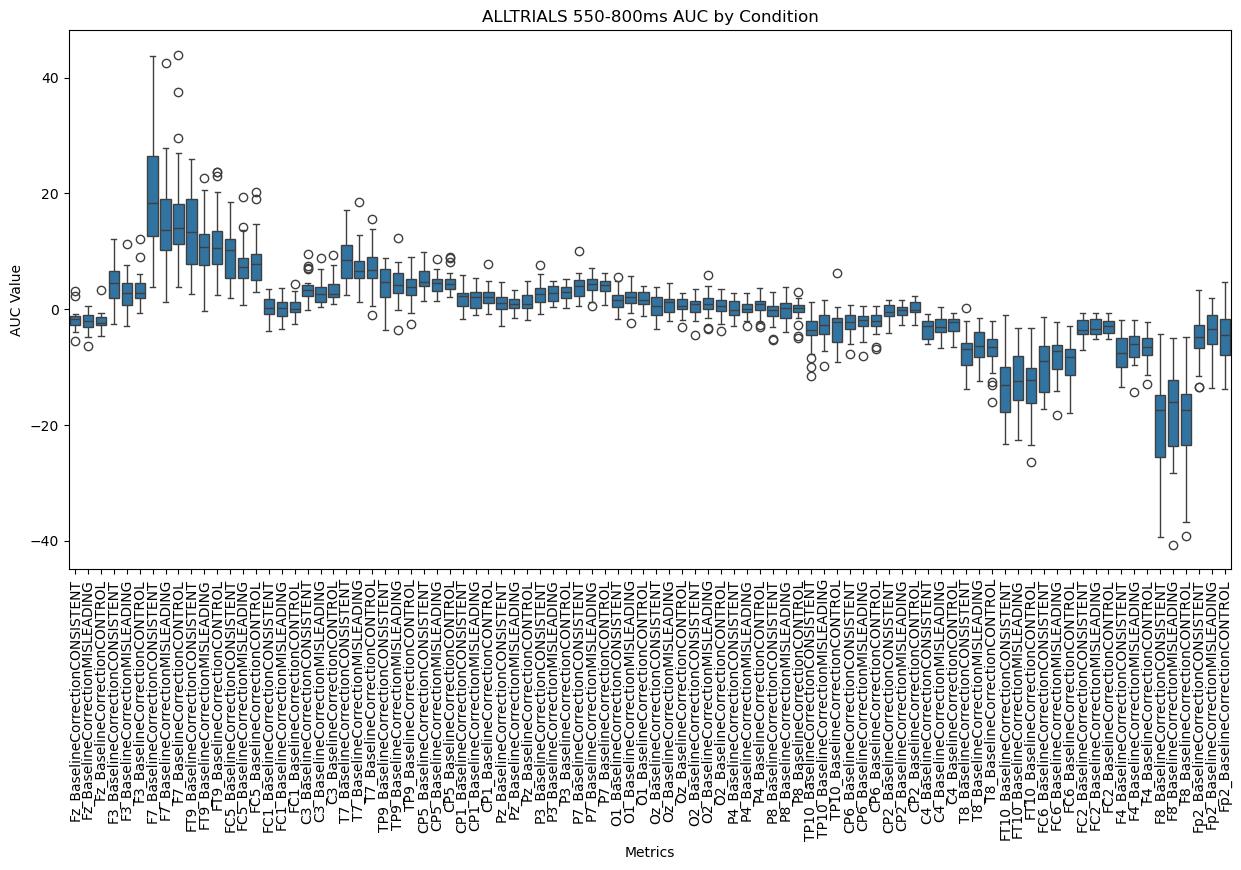

In [14]:

for component, data in peak_data.items():
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='Metric', y='Value', data=data)
    plt.xticks(rotation=90)
    plt.title(f'{component} Peak Metrics by Condition')
    plt.ylabel('Value (Voltage/Latency)')
    plt.xlabel('Metrics')
    plt.show()


for time_window, data in alltrial_data.items():
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='Metric', y='Value', data=data)
    plt.xticks(rotation=90)
    plt.title(f'ALLTRIALS {time_window} AUC by Condition')
    plt.ylabel('AUC Value')
    plt.xlabel('Metrics')
    plt.show()


Data Standardization

In [16]:
scaler = StandardScaler()

for component in peak_data:
    peak_data[component]['Value'] = scaler.fit_transform(peak_data[component]['Value'].values.reshape(-1, 1))

for time_window in alltrial_data:
    alltrial_data[time_window]['Value'] = scaler.fit_transform(alltrial_data[time_window]['Value'].values.reshape(-1, 1))


Feature Engineering

In [18]:
peak_combined = pd.concat([df.assign(Component=key) for key, df in peak_data.items()], axis=0)
alltrials_combined = pd.concat([df.assign(TimeWindow=key) for key, df in alltrial_data.items()], axis=0)

peak_summary = peak_combined.groupby(['Component', 'Metric']).agg({'Value': ['mean', 'std']}).reset_index()
peak_summary.columns = ['Component', 'Metric', 'Mean_Value', 'Std_Value']

alltrials_summary = alltrials_combined.groupby(['TimeWindow', 'Metric']).agg({'Value': ['mean', 'std']}).reset_index()
alltrials_summary.columns = ['TimeWindow', 'Metric', 'Mean_Value', 'Std_Value']

# Filtering the features with high variability
important_peak_features = peak_summary[peak_summary['Std_Value'] > 0.5]
important_alltrials_features = alltrials_summary[alltrials_summary['Std_Value'] > 0.5]

print("Important Peak Features:\n", important_peak_features)
print("Important ALLTRIALS Features:\n", important_alltrials_features)


Important Peak Features:
 Empty DataFrame
Columns: [Component, Metric, Mean_Value, Std_Value]
Index: []
Important ALLTRIALS Features:
     TimeWindow                            Metric  Mean_Value  Std_Value
3    150-275ms   C4_BaselineCorrectionCONSISTENT    0.173320   0.587773
4    150-275ms      C4_BaselineCorrectionCONTROL    0.266953   0.647184
5    150-275ms   C4_BaselineCorrectionMISLEADING    0.223301   0.624649
11   150-275ms  CP2_BaselineCorrectionMISLEADING    0.582135   0.569568
13   150-275ms     CP5_BaselineCorrectionCONTROL    0.125420   0.556649
..         ...                               ...         ...        ...
406  550-800ms     FT9_BaselineCorrectionCONTROL    1.495794   0.759844
407  550-800ms  FT9_BaselineCorrectionMISLEADING    1.341308   0.672086
408  550-800ms  Fp2_BaselineCorrectionCONSISTENT   -0.656746   0.520055
409  550-800ms     Fp2_BaselineCorrectionCONTROL   -0.567482   0.552782
410  550-800ms  Fp2_BaselineCorrectionMISLEADING   -0.486870   0.513882



Statistical Analysis

In [21]:
# Performing the ANOVA for selected electrodes
selected_electrodes = ['C4', 'CP2', 'Fp2', 'FT9']
filtered_data = alltrials_combined[
    alltrials_combined['Metric'].str.contains('|'.join(selected_electrodes))
]

for time_window in filtered_data['TimeWindow'].unique():
    print(f"\nANOVA Results for Time Window: {time_window}")
    for electrode in selected_electrodes:
        electrode_data = filtered_data[
            (filtered_data['Metric'].str.contains(electrode)) &
            (filtered_data['TimeWindow'] == time_window)
        ]

        consistent = electrode_data[electrode_data['Metric'].str.contains('CONSISTENT')]['Value']
        control = electrode_data[electrode_data['Metric'].str.contains('CONTROL')]['Value']
        misleading = electrode_data[electrode_data['Metric'].str.contains('MISLEADING')]['Value']

        f_stat, p_value = f_oneway(consistent, control, misleading)
        print(f"Electrode: {electrode} | F-Stat: {f_stat:.2f} | P-Value: {p_value:.5f}")



ANOVA Results for Time Window: 150-275ms
Electrode: C4 | F-Stat: 0.14 | P-Value: 0.86734
Electrode: CP2 | F-Stat: 0.94 | P-Value: 0.39645
Electrode: Fp2 | F-Stat: 0.44 | P-Value: 0.64497
Electrode: FT9 | F-Stat: 0.02 | P-Value: 0.97595

ANOVA Results for Time Window: 150-350ms
Electrode: C4 | F-Stat: 0.13 | P-Value: 0.87884
Electrode: CP2 | F-Stat: 0.39 | P-Value: 0.67789
Electrode: Fp2 | F-Stat: 0.40 | P-Value: 0.67297
Electrode: FT9 | F-Stat: 0.04 | P-Value: 0.96027

ANOVA Results for Time Window: 250-400ms
Electrode: C4 | F-Stat: 0.23 | P-Value: 0.79690
Electrode: CP2 | F-Stat: 0.18 | P-Value: 0.83848
Electrode: Fp2 | F-Stat: 0.18 | P-Value: 0.83526
Electrode: FT9 | F-Stat: 0.05 | P-Value: 0.95448

ANOVA Results for Time Window: 300-500ms
Electrode: C4 | F-Stat: 0.26 | P-Value: 0.76844
Electrode: CP2 | F-Stat: 0.05 | P-Value: 0.95395
Electrode: Fp2 | F-Stat: 0.16 | P-Value: 0.85188
Electrode: FT9 | F-Stat: 0.20 | P-Value: 0.82253

ANOVA Results for Time Window: 550-800ms
Electrode:

Machine Learning

In [32]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Fix compatibility
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))
    print("Confusion Matrix:")
    print(confusion_matrix(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

  CONSISTENT       0.31      0.87      0.46       142
     CONTROL       0.23      0.02      0.04       158
  MISLEADING       0.29      0.07      0.12       150

    accuracy                           0.31       450
   macro avg       0.28      0.32      0.20       450
weighted avg       0.28      0.31      0.20       450

Confusion Matrix:
[[124   6  12]
 [140   3  15]
 [135   4  11]]
--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

  CONSISTENT       0.35      0.36      0.36       142
     CONTROL       0.34      0.34      0.34       158
  MISLEADING       0.26      0.25      0.25       150

    accuracy                           0.32       450
   macro avg       0.32      0.32      0.32       450
weighted avg       0.32      0.32      0.32       450

Confusion Matrix:
[[51 38 53]
 [47 53 58]
 [46 66 38]]
--- SVM ---
Classificat

C:\Users\Loaner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Loaner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Loaner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

  CONSISTENT       0.31      0.41      0.35       142
     CONTROL       0.35      0.30      0.32       158
  MISLEADING       0.29      0.25      0.27       150

    accuracy                           0.32       450
   macro avg       0.32      0.32      0.31       450
weighted avg       0.32      0.32      0.31       450

Confusion Matrix:
[[58 37 47]
 [67 47 44]
 [63 50 37]]


C:\Users\Loaner\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Classification Report:
              precision    recall  f1-score   support

  CONSISTENT       0.35      0.39      0.37       142
     CONTROL       0.39      0.37      0.38       158
  MISLEADING       0.31      0.29      0.30       150

    accuracy                           0.35       450
   macro avg       0.35      0.35      0.35       450
weighted avg       0.35      0.35      0.35       450

Confusion Matrix:
[[56 35 51]
 [54 58 46]
 [50 56 44]]


Correlation Analysis

In [36]:
def compute_correlations_all(peak_data, alltrial_data, condition):
   
    correlations = {}

    for peak_key, peak_df in peak_data.items():
       
        peak_condition = peak_df.set_index('File')

        for alltrial_key, alltrial_df in alltrial_data.items():
            alltrial_filtered = alltrial_df.set_index('File')

            common_files = peak_condition.index.intersection(alltrial_filtered.index)
            peak_filtered = peak_condition.loc[common_files]
            alltrial_filtered = alltrial_filtered.loc[common_files]

            print(f"\nComponent: {peak_key}, Window: {alltrial_key}, Common Files: {len(common_files)}")

            for peak_col in [col for col in peak_filtered.columns if '-V' in col]:
                for auc_col in alltrial_filtered.columns:
                    valid_data = pd.concat([peak_filtered[peak_col], alltrial_filtered[auc_col]], axis=1).dropna()
                    if len(valid_data) > 1:  
                        corr, _ = pearsonr(valid_data[peak_col], valid_data[auc_col])
                        correlations[f"{peak_key} | {peak_col} vs {alltrial_key} | {auc_col}"] = corr
    return correlations

misleading_correlations = compute_correlations_all(peak_data, alltrial_data, 'MISLEADING')

if misleading_correlations:
    print("\nAll Correlations for MISLEADING Condition:")
    for pair, corr in sorted(misleading_correlations.items(), key=lambda x: -abs(x[1])):
        print(f"{pair}: {corr:.3f}")
else:
    print("\nNo significant correlations found for the MISLEADING condition.")



Component: P2, Window: 150-275ms, Common Files: 25

Component: P2, Window: 150-350ms, Common Files: 25

Component: P2, Window: 250-400ms, Common Files: 25

Component: P2, Window: 300-500ms, Common Files: 25

Component: P2, Window: 550-800ms, Common Files: 25

Component: FN400, Window: 150-275ms, Common Files: 25

Component: FN400, Window: 150-350ms, Common Files: 25

Component: FN400, Window: 250-400ms, Common Files: 25

Component: FN400, Window: 300-500ms, Common Files: 25

Component: FN400, Window: 550-800ms, Common Files: 25

Component: N2, Window: 150-275ms, Common Files: 25

Component: N2, Window: 150-350ms, Common Files: 25

Component: N2, Window: 250-400ms, Common Files: 25

Component: N2, Window: 300-500ms, Common Files: 25

Component: N2, Window: 550-800ms, Common Files: 25

Component: P3, Window: 150-275ms, Common Files: 25

Component: P3, Window: 150-350ms, Common Files: 25

Component: P3, Window: 250-400ms, Common Files: 25

Component: P3, Window: 300-500ms, Common Files: 